In [1]:
#Import all the neccesarry packages
#Kmeans clustering of iris dataset
import  matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import  Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import  PCA
from sklearn.metrics import silhouette_score,adjusted_rand_score


import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('data/iris.csv')

data = df.iloc[:,:4].to_numpy()
data[:5]
true_labels_names = df[df.columns[-1]].to_numpy()
true_labels_names[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [3]:
# do some label encoding
label_encoder = LabelEncoder()
label_encoder.fit(true_labels_names)
true_labels = label_encoder.transform(true_labels_names)
display(true_labels[:5])
display(true_labels_names[:5])


array([0, 0, 0, 0, 0])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [4]:
# pipeline to process the data
# apply PCA for dimesionality reduction
preprocessor = Pipeline([
    ("scaler",MinMaxScaler()),
    ("pca",PCA(n_components=2,random_state=42))
])

In [5]:
# setup the clusterer
clusterer = Pipeline([
    (
        "kmeans",
        KMeans(
            init = "random",
            n_clusters = 3,
            n_init =10,
            max_iter = 300,
            random_state = 42
        ),
    ),
])

In [6]:
# Define the pipe and fit it with the data
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(init='random', n_clusters=3,
                                         random_state=42))]))])

In [9]:
# evaluate the performance
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)
adjusted_rand_score(true_labels_names, predicted_labels)

print(f"Silhoute: {silhouette_score(preprocessed_data,predicted_labels)} \nAdjusted rand score: {adjusted_rand_score(true_labels_names,predicted_labels)}")


Silhoute: 0.5652241879059784 
Adjusted rand score: 0.7163421126838476


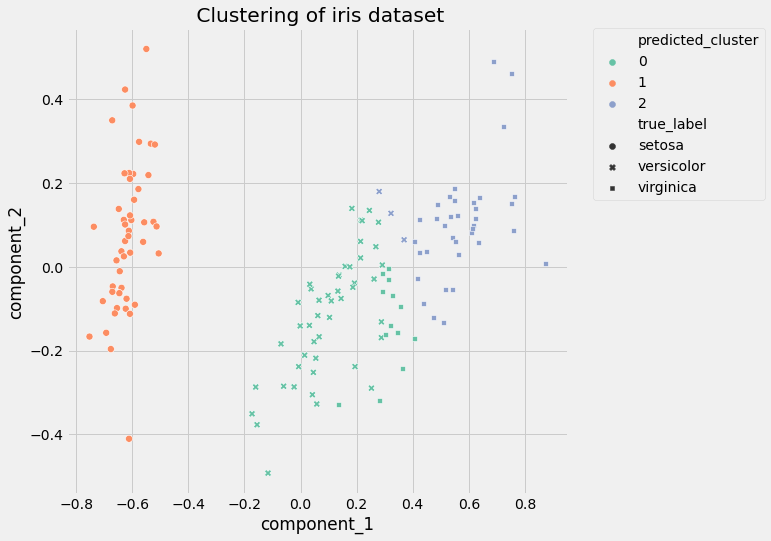

In [10]:
# get the data to plot
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["Dimension_1","Dimension_2"],
    
)
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"]=label_encoder.inverse_transform(true_labels)
#plotting
plt.style.use("fivethirtyeight")
plt.figure(figsize =(8,8))
scat = sns.scatterplot(
    x="Dimension_1",
    y="Dimension_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)
scat.set_title(" Clustering of iris dataset")
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.0)
plt.show()